<a href="https://colab.research.google.com/github/YogeshPandey29/Projects/blob/master/Predicting_House_Prices_using_Multivariate_Linear_Regression_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This is a straight-forward implementation of Multivariate Linear Regression. Given a dataset comprising of various features related to various houses, and depending upon those features, we are required to predict prices per unit are of the corresponding houses.
P.S - I have used sklearn library of Python to gain certain amount of edge while implementing this algorithm.

In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [7]:
data = pd.read_csv('RealEstatePricePrediction.csv')
data.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   No                                      414 non-null    int64  
 1   X1 transaction date                     414 non-null    float64
 2   X2 house age                            414 non-null    float64
 3   X3 distance to the nearest MRT station  414 non-null    float64
 4   X4 number of convenience stores         414 non-null    int64  
 5   X5 latitude                             414 non-null    float64
 6   X6 longitude                            414 non-null    float64
 7   Y house price of unit area              414 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 26.0 KB


In [9]:
data.isnull()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
409,False,False,False,False,False,False,False,False
410,False,False,False,False,False,False,False,False
411,False,False,False,False,False,False,False,False
412,False,False,False,False,False,False,False,False


In [15]:
X = data.iloc[:, 0:7]
X

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245
...,...,...,...,...,...,...,...
409,410,2013.000,13.7,4082.01500,0,24.94155,121.50381
410,411,2012.667,5.6,90.45606,9,24.97433,121.54310
411,412,2013.250,18.8,390.96960,7,24.97923,121.53986
412,413,2013.000,8.1,104.81010,5,24.96674,121.54067


In [17]:
y = data.iloc[:, -1]
y

0      37.9
1      42.2
2      47.3
3      54.8
4      43.1
       ... 
409    15.4
410    50.0
411    40.6
412    52.5
413    63.9
Name: Y house price of unit area, Length: 414, dtype: float64

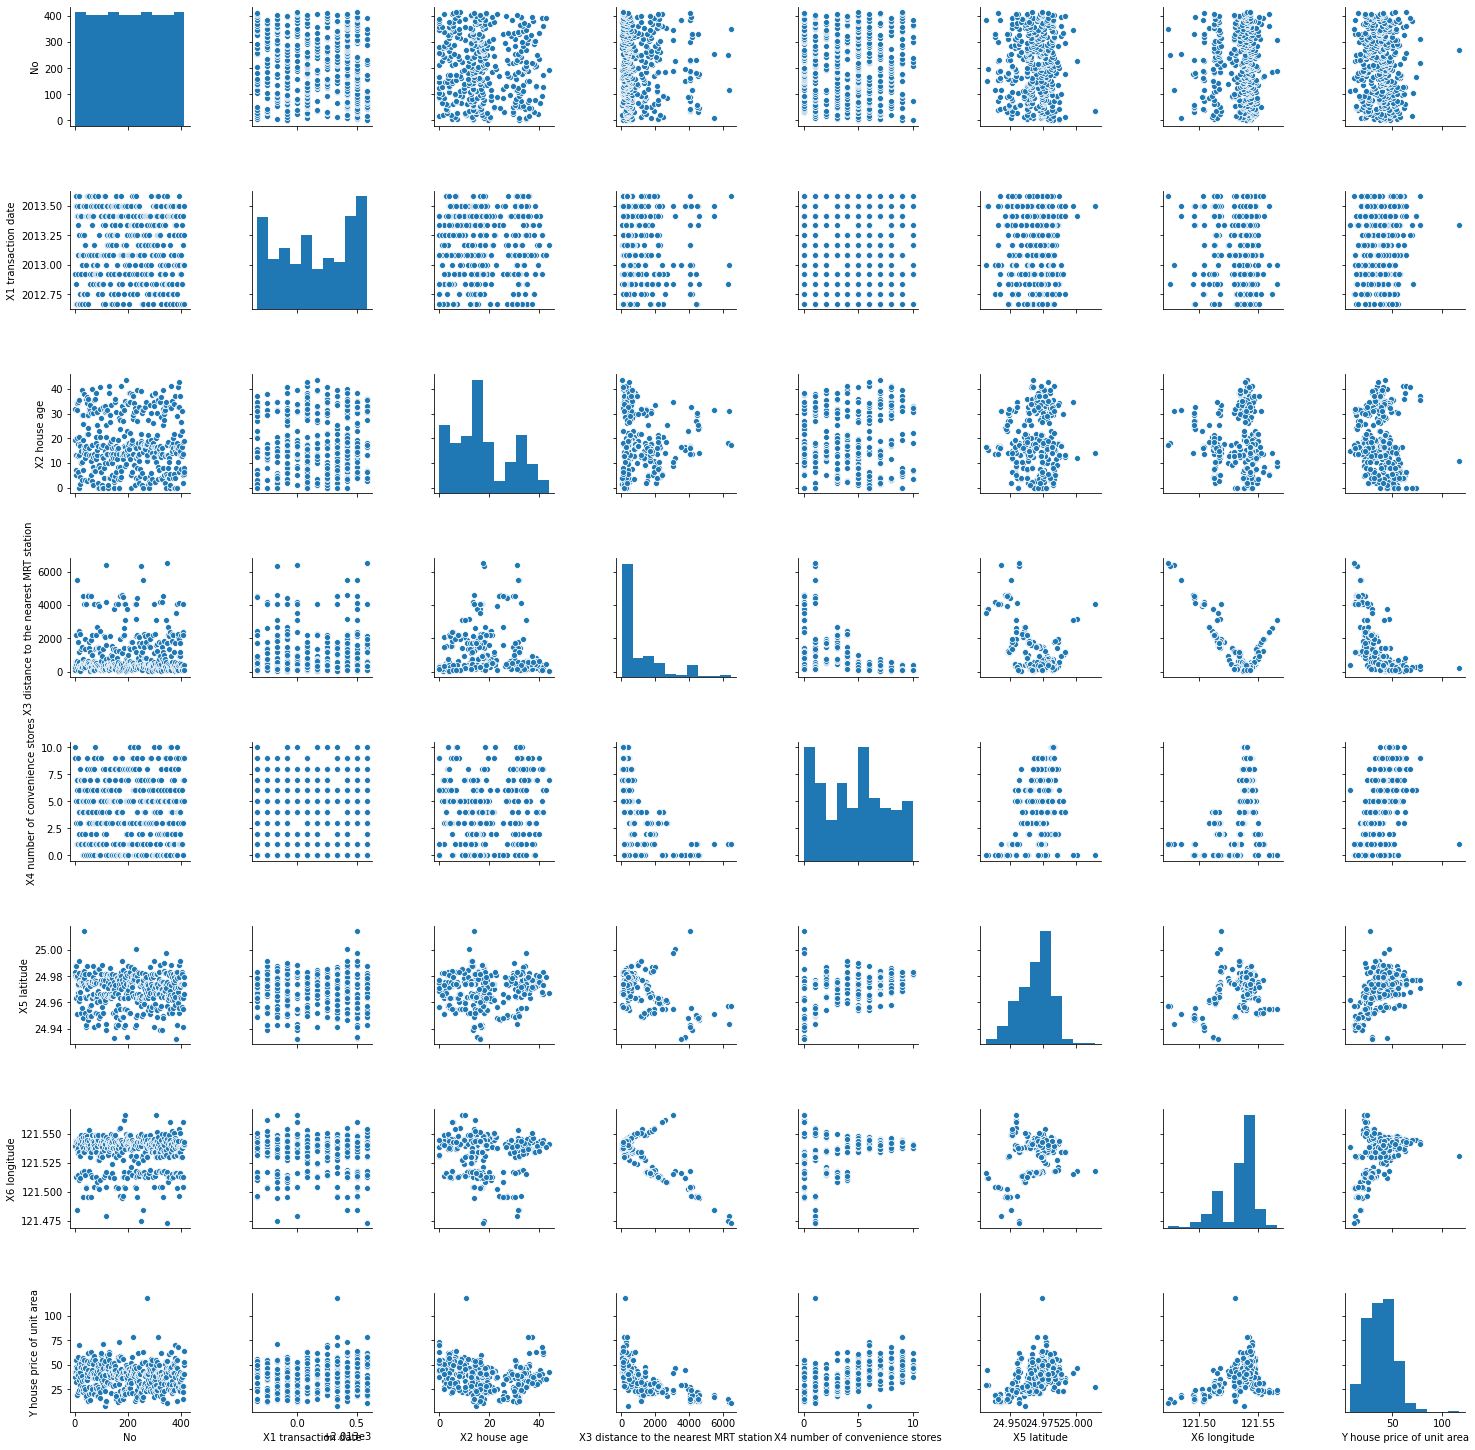

In [20]:
sns.pairplot(data)

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30)

In [23]:
from sklearn.linear_model import LinearRegression
linearModel = LinearRegression()
linearModel.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [26]:
print(linearModel.coef_)
print(linearModel.intercept_)

[-5.95218779e-03  3.72752228e+00 -2.88025435e-01 -3.89872514e-03
  1.30075670e+00  2.27878344e+02  1.99406617e+01]
-15574.15548036714


In [27]:
predictions = linearModel.predict(X_test)
print(predictions)

[40.74868471 45.19144187 43.10485443 47.31591212 55.30522586 41.18394567
 32.96193677 32.00455166 43.59735064 40.6318779  45.74739542 54.17767887
 37.53202974 44.64829525 38.71655742 46.235212   41.55366948  2.62256146
 55.3093713  49.97731103 33.12875741 44.29453637 50.25266005 38.68244261
 36.37431913 15.65688079 30.89219284 24.39735278 36.62672378 39.71509094
 51.7427867  31.05771651 42.23142098 34.52411341 39.30624835 25.52451287
 54.5934508  42.93794753 42.34540288 31.54420801 13.23363895  9.98094253
 47.48517144 46.48591852 39.12959793 47.61195476 31.09442325 35.23216283
 39.86876939 22.64156087 48.47450555 33.43365357 43.70406592 32.35498001
 26.76551667 31.63751636 37.80798032 49.11527727 40.59302416 42.12028498
 33.58757634 43.830622   33.10875689 43.03160176 32.21479502 43.81163824
 52.98718908 39.92449316 29.36860144 33.6483207  48.12987779 49.03712912
 38.16994346 25.68751704 52.06644961 48.46025728 26.16900283 28.75800568
 43.0062866  50.15924248 45.42113229 40.33316828 38

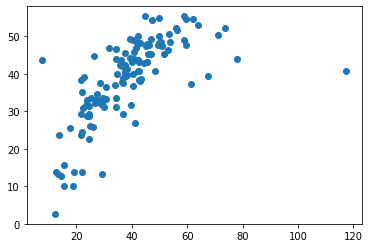

In [28]:
plt.scatter(y_test, predictions)
plt.show()

(array([ 1.,  4., 53., 55.,  6.,  4.,  1.,  0.,  0.,  1.]),
 array([-36.10406592, -24.8185278 , -13.53298967,  -2.24745155,
          9.03808657,  20.32362469,  31.60916281,  42.89470093,
         54.18023905,  65.46577717,  76.75131529]),
 <a list of 10 Patch objects>)

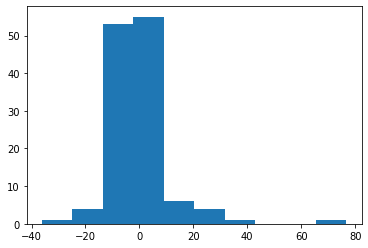

In [29]:
plt.hist(y_test - predictions)

In [31]:
from sklearn import metrics
MEAN_SQUARED_ERROR = np.sqrt(metrics.mean_squared_error(y_test, predictions))
print(MEAN_SQUARED_ERROR)

11.225105309187716
